## **Group Activity: Report on Data Exploration Techniques**

**Stroke Prediction Dataset by fedesoriano**

www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



---



Submitted by: Group - JUGIL AND BODYGUARDS
*   Cloma, Trixie Gail
*   Cagata, Ericka Joyce
*   Olalo, Sherlyn
*   Cabuenas, Jugil
*   Paez, Marie Antoinette

CSIT342 - G2

September 23. 2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---

# **1.) Importing**
Google Drive location: /content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra


In [ ]:
#Import Tensorflow for model building ("Utilize TensorFlow to build a simple machine learning model.")

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



---

# **2.) Showcase Data**

In [ ]:
#Read data
data = pd.read_csv('/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv')

#Show first 5 data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Count number of rows from data
len(data)

5110

In [ ]:
#Show columns and their data type
print(data.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object




---

# **3.) Data Preprocessing - Cleaning**

In [ ]:
#Checking of values with NaN

# Replace string "Unknown"
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient
data.replace("Unknown", pd.NA, inplace=True)

data.isna().any(axis =0)

,0
id,False
gender,False
age,False
hypertension,False
heart_disease,False
ever_married,False
work_type,False
Residence_type,False
avg_glucose_level,False
bmi,True


In [ ]:
# Clean dataset with missing values (Nan and "Unknown")

# Drop rows with Nan values
data.dropna(inplace = True)

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

#After cleaning, Show number of rows
len(data)

3426

In [ ]:
# Checking of NaN values after cleaning

data.isna().any(axis =0)

,0
id,False
gender,False
age,False
hypertension,False
heart_disease,False
ever_married,False
work_type,False
Residence_type,False
avg_glucose_level,False
bmi,False


In [ ]:
#Show first 5 data after cleaning

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1




---

# **4.) Data Preprocessing - Splitting Data**
*Split the dataset into features (inputs) and target (output)*

In [ ]:
# Split dataset into features and target
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']


In [ ]:
# Output the converted features and target variable
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
3421    Male  82.0             1              0          Yes  Self-employed   
3422  Female  57.0             0              0          Yes        Private   
3423  Female  81.0             0              0          Yes  Self-employed   
3424  Female  35.0             0              0          Yes  Self-employed   
3425    Male  51.0             0              0          Yes        Private   

     Residence_type  avg_glucose_leve

In [ ]:
# Preprocessing categorical variables
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

# Convert target variable to NumPy array
y = y.to_numpy()

# Convert target variable to numeric (optional for kNN)
#y = y.astype(int)



---

# **5.) Train-test Split**

In [ ]:
# Split dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the training and validation sets
print("Training set size (X_train):", X_train.shape)
print("Validation set size (X_test):", X_test.shape)
print("Training set size (y_train):", y_train.shape)
print("Validation set size (y_test):", y_test.shape)


Training set size (X_train): (2740, 20)
Validation set size (X_test): (686, 20)
Training set size (y_train): (2740,)
Validation set size (y_test): (686,)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Output standardized features
print("Standardized Features (X_train):")
print(X_train)
print("\nStandardized Features (X_test):")
print(X_test)

Standardized Features (X_train):
[[-1.27654163  1.27654163  0.         ... -0.24902912 -0.94489833
  -0.3130484 ]
 [ 0.78336654 -0.78336654  0.         ... -0.24902912  2.99793323
   0.68541875]
 [ 0.78336654 -0.78336654  0.         ... -0.24902912 -0.05228857
  -0.06343161]
 ...
 [ 0.78336654 -0.78336654  0.         ... -0.24902912 -0.52889228
  -1.11736916]
 [-1.27654163  1.27654163  0.         ... -0.24902912 -0.30977619
   0.13071478]
 [-1.27654163  1.27654163  0.         ... -0.24902912 -0.53098908
  -0.65973839]]

Standardized Features (X_test):
[[ 0.78336654 -0.78336654  0.         ... -0.24902912  0.54739758
  -0.2853132 ]
 [-1.27654163  1.27654163  0.         ...  4.0155946  -0.29384047
   1.89189989]
 [ 0.78336654 -0.78336654  0.         ... -0.24902912  0.01648662
   1.87803229]
 ...
 [-1.27654163  1.27654163  0.         ... -0.24902912 -0.0315302
  -0.3685188 ]
 [-1.27654163  1.27654163  0.         ... -0.24902912 -0.70145931
  -0.95095797]
 [-1.27654163  1.27654163  0.    



---

# **6.) Build the Model**

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




---

# **7.) Compile the Model**

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Display the compiled model
print("Compiled Model:")
print(model.summary())

Compiled Model:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

None




---

# **8.) Train the Model**

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7423 - loss: 0.4863 - val_accuracy: 0.9359 - val_loss: 0.2222
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9518 - loss: 0.1728 - val_accuracy: 0.9359 - val_loss: 0.2051
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9507 - loss: 0.1625 - val_accuracy: 0.9359 - val_loss: 0.1997
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9548 - loss: 0.1520 - val_accuracy: 0.9359 - val_loss: 0.1975
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1598 - val_accuracy: 0.9359 - val_loss: 0.2003
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1406 - val_accuracy: 0.9359 - val_loss: 0.1944
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9483 - loss: 0.1493 - val_accuracy: 0.9359 - val_loss: 0.2007
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.1464 - val_accuracy: 0.9359 - val_loss:



---

# **9.) Test Accuracy**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2064 
Test Accuracy: 0.9373177886009216


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


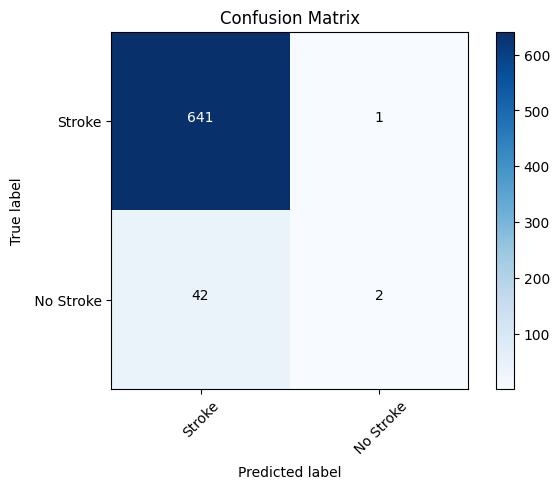

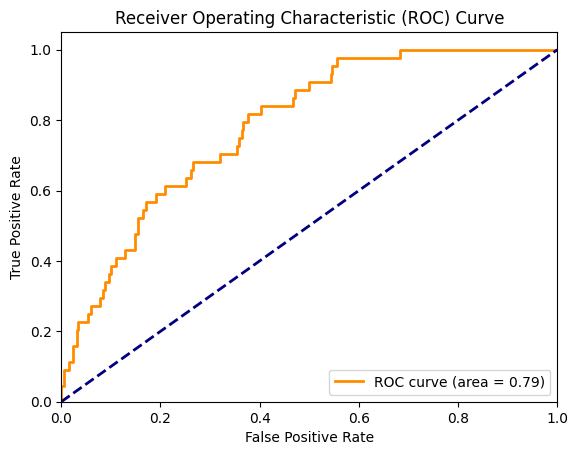

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Stroke", " No Stroke"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




---

# **10.) kNN (Optional)**

Iris dataset reference

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  31112    Male  80.0             0              1          Yes   
2  60182  Female  49.0             0              0          Yes   
3   1665  Female  79.0             1              0          Yes   
4  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1        Private          Rural             105.92  32.5     never smoked   
2        Private          Urban             171.23  34.4           smokes   
3  Self-employed          Rural             174.12  24.0     never smoked   
4        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 0 to 3425
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3426 non-null   int64  
 1   gender             3426 non-null   object 
 2   age                3426 non-null   float64
 3   hypertension       3426 non-null   int64  
 4   heart_disease      3426 non-null   int64  
 5   ever_married       3426 non-null   object 
 6   work_type          3426 non-null   object 
 7   Residence_type     3426 non-null   object 
 8   avg_glucose_level  3426 non-null   float64
 9   bmi                3426 non-null   float64
 10  smoking_status     3426 non-null   object 
 11  stroke             3426 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 321.3+ KB
None


In [ ]:
print(data.describe())

                 id          age  hypertension  heart_disease  \
count   3426.000000  3426.000000   3426.000000    3426.000000   
mean   37339.006130    48.645943      0.119089       0.060128   
std    21049.976345    18.851239      0.323941       0.237759   
min       84.000000    10.000000      0.000000       0.000000   
25%    18997.500000    34.000000      0.000000       0.000000   
50%    38068.500000    50.000000      0.000000       0.000000   
75%    55464.250000    63.000000      0.000000       0.000000   
max    72915.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        3426.000000  3426.000000  3426.000000  
mean          108.321891    30.290047     0.052539  
std            47.703541     7.295958     0.223145  
min            55.120000    11.500000     0.000000  
25%            77.237500    25.300000     0.000000  
50%            92.360000    29.100000     0.000000  
75%           116.207500    34.100000     0

In [ ]:
# Build the kNN classifier
k = 3  # Number of neighbors (ILIS ILISI LANG DIRI DAPIT, IF 4+, NAAY ADD.ERROR MANGGAWAS)
knn = KNeighborsClassifier(n_neighbors=k)

# Train the kNN classifier
knn.fit(X_train, y_train)

# Predict on the validation set
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[[637   5]
 [ 41   3]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       642
           1       0.38      0.07      0.12        44

    accuracy                           0.93       686
   macro avg       0.66      0.53      0.54       686
weighted avg       0.90      0.93      0.91       686

Accuracy: 0.9329446064139941




---

# **11.) Logistic Regression (Optional)**


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [ ]:
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9358600583090378




---

# **12.) Basic Descriptive Statistics**


MEAN

In [ ]:
data[['age', 'avg_glucose_level', 'bmi']].mean()

,0
age,48.645943
avg_glucose_level,108.321891
bmi,30.290047


MEDIAN

In [ ]:
data[['age', 'avg_glucose_level', 'bmi']].median()

,0
age,50.00
avg_glucose_level,92.36
bmi,29.10


MODE

In [ ]:
data[['age', 'avg_glucose_level', 'bmi']].mode()

,age,avg_glucose_level,bmi
0,54.0,73.00,28.4
1,NaN,91.85,28.7


PERCENTILE

In [ ]:
data[['age', 'avg_glucose_level', 'bmi']].quantile([0.25, 0.5, 0.75])

,age,avg_glucose_level,bmi
0.25,34.0,77.2375,25.3
0.50,50.0,92.3600,29.1
0.75,63.0,116.2075,34.1


STANDARD DEVIATION

In [ ]:
std_dev = data[['age', 'avg_glucose_level', 'bmi']].std()
print(std_dev)


age                  18.851239
avg_glucose_level    47.703541
bmi                   7.295958
dtype: float64


VARIANCE

In [ ]:
variance_values = data[['age', 'avg_glucose_level', 'bmi']].var()
print(variance_values)

age                   355.369205
avg_glucose_level    2275.627777
bmi                    53.231010
dtype: float64


MIN

In [ ]:
min_values = data[['age', 'avg_glucose_level', 'bmi']].min()

print(min_values)


age                  10.00
avg_glucose_level    55.12
bmi                  11.50
dtype: float64


MAX

In [ ]:
max_values = data[['age', 'avg_glucose_level', 'bmi']].max()

print(max_values)


age                   82.00
avg_glucose_level    271.74
bmi                   92.00
dtype: float64


RANGE

In [ ]:
range_values = max_values - min_values

print(range_values)


age                   72.00
avg_glucose_level    216.62
bmi                   80.50
dtype: float64


PERCENTILES (25th, 50th, 75th)

In [ ]:
data[['age', 'avg_glucose_level', 'bmi']].quantile([0.25, 0.5, 0.75])

,age,avg_glucose_level,bmi
0.25,34.0,77.2375,25.3
0.50,50.0,92.3600,29.1
0.75,63.0,116.2075,34.1


<h2> Histogram </h>

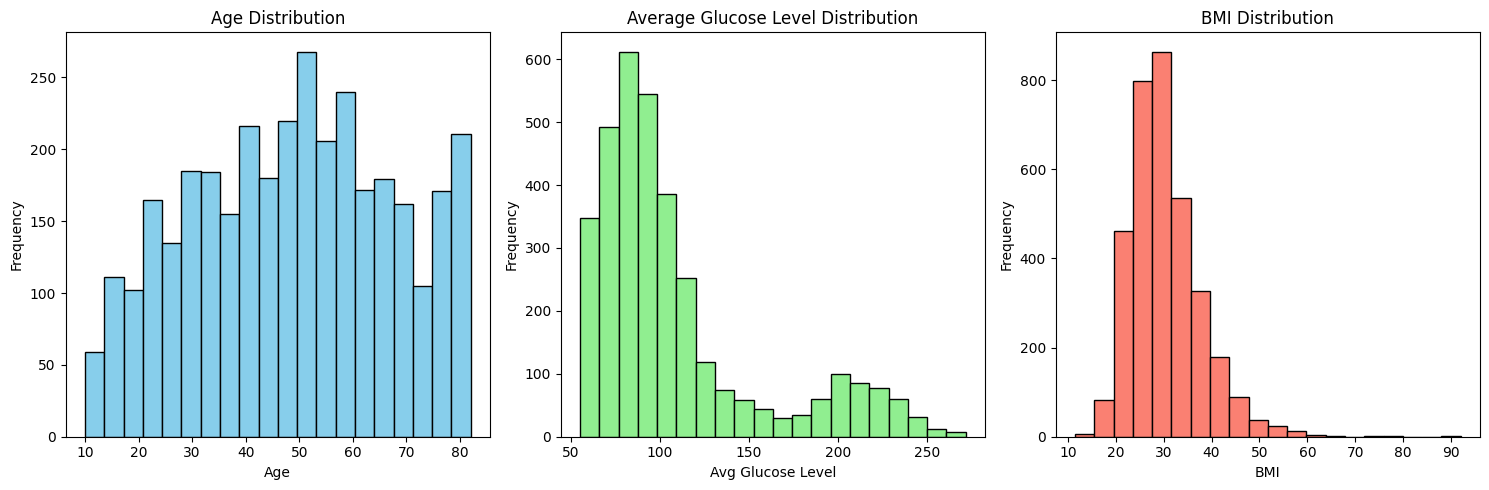

In [ ]:
# histograms age, avg_glucose_level, and bmi
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Average Glucose Level
plt.subplot(1, 3, 2)
plt.hist(data['avg_glucose_level'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frequency')

# BMI
plt.subplot(1, 3, 3)
plt.hist(data['bmi'], bins=20, color='salmon', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

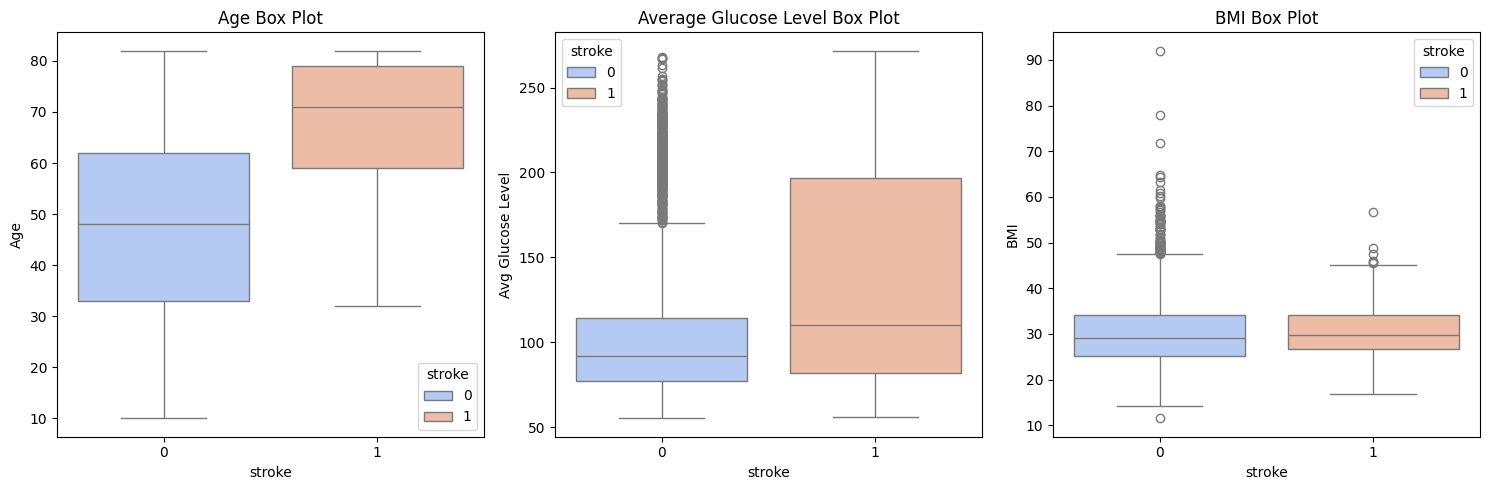

In [ ]:
# Create a new box plot with separate plots for age, avg_glucose_level, and BMI
filtered_data = data[['age', 'avg_glucose_level', 'bmi', 'stroke']]
plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', data=filtered_data, palette="coolwarm", hue="stroke")
plt.title('Age Box Plot')
plt.ylabel('Age')

# Average Glucose Level
plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='avg_glucose_level', data=filtered_data, palette="coolwarm",hue="stroke")
plt.title('Average Glucose Level Box Plot')
plt.ylabel('Avg Glucose Level')

# BMI
plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='bmi', data=filtered_data, palette="coolwarm", hue="stroke")
plt.title('BMI Box Plot')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

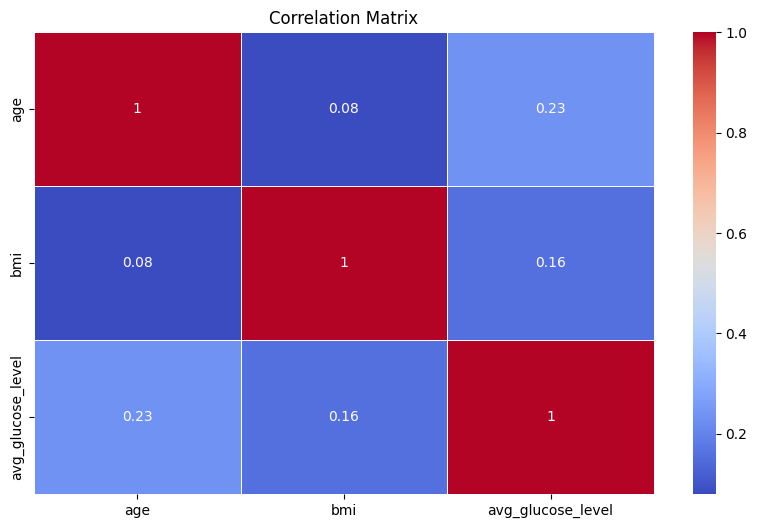

In [ ]:
# Heatmap
selected_columns = ['age', 'bmi', 'avg_glucose_level']

filtered_correlation_matrix = data[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            xticklabels=filtered_correlation_matrix.columns,
            yticklabels=filtered_correlation_matrix.columns)

plt.title('Correlation Matrix')
plt.show()